In [1]:
import pandas as pd


In [2]:
df = pd.read_pickle('static_bike_ride_pm.pkl')
df1= df.drop(df.columns[[0,1]], axis=1)

j=[]
for i in range(1,100):
    j.append(i)
    
df2= df1.drop(df1.columns[[j]], axis=1)

df3= df2.drop(df2.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19]], axis=1)

df4= df3.drop(df3.columns[[4]], axis=1)

j=[]
for i in range(4,72):
    j.append(i)
    
df5= df4.drop(df4.columns[[j]], axis=1)
df6= df5.drop(df5.columns[[5,10,11,12,13,14,15,16,17,18]], axis=1)

df7= df6.drop(df6.columns[[7]], axis=1) ## The GSR data is wrong
df7.rename(columns={'pm2_5_palas':'$\mathrm{PM_{2.5}}$', 'pda': 'Average Pupil Diameter', 'pup_dis': 'Pupil Distance','pd_diff':'Difference in Pupil Diameter', 'Resp.':'Respiration rate','SpO2':'$\mathrm{SpO_2}$','Temp.': 'Skin Temperature','HR': 'Heart Rate' }, inplace=True)

df7['$\mathrm{SpO_2}$']=df7['$\mathrm{SpO_2}$']*1000000 ## change the SpO2 to percentage

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:5069: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [3]:
bands = {'delta': (1, 3),
         'theta': (4, 7),
         'alpha': (8, 12),
         'beta': (13, 25),
         'gamma': (26, 45)}

ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7','F8', 'T8',
        'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6',
        'CP5', 'CP6', 'FT9', 'FT10', 'FCz', 'AFz', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2',
        'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6',
        'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'TP10']

eeg_cols = [j+"-"+i+' ($\mathrm{V^2}$/Hz)' for i in bands.keys() for j in ch_names]


In [4]:
non_eeg_cols=['$\mathrm{PM_{2.5} (\mu g/m^3)}$', 'Average Pupil Diameter (mm)', 'Pupil Distance (mm)','Difference in Pupil Diameter (mm)', 'Respiration rate (brpm)','$\mathrm{SpO_2}$ (%)', 'Heart Rate (bpm)', 'Skin Temperature ($\mathrm{^o C})$']

new_columns=non_eeg_cols+eeg_cols

df7.columns = new_columns
df7

,$\mathrm{PM_{2.5} (\mu g/m^3)}$,Average Pupil Diameter (mm),Pupil Distance (mm),Difference in Pupil Diameter (mm),Respiration rate (brpm),$\mathrm{SpO_2}$ (%),Heart Rate (bpm),Skin Temperature ($\mathrm{^o C})$,Fp1-delta ($\mathrm{V^2}$/Hz),Fp2-delta ($\mathrm{V^2}$/Hz),...,FT7-gamma ($\mathrm{V^2}$/Hz),FT8-gamma ($\mathrm{V^2}$/Hz),TP7-gamma ($\mathrm{V^2}$/Hz),TP8-gamma ($\mathrm{V^2}$/Hz),PO7-gamma ($\mathrm{V^2}$/Hz),PO8-gamma ($\mathrm{V^2}$/Hz),Fpz-gamma ($\mathrm{V^2}$/Hz),CPz-gamma ($\mathrm{V^2}$/Hz),POz-gamma ($\mathrm{V^2}$/Hz),TP10-gamma ($\mathrm{V^2}$/Hz)
dateTime,,,,,,,,,,,,,,,,,,,,,
2021-10-21 22:37:57,1.84,3.855,61.09,-0.33,29.114576,100.0,87.0,31.2500,-0.226365,0.120282,...,-0.289645,-0.172489,-0.107086,0.173857,-0.820702,0.164320,-0.702439,-0.775170,-1.340020,-0.587620
2021-10-21 22:37:59,2.05,4.080,60.80,-0.30,28.610229,99.0,90.0,31.1875,-0.505186,-0.696287,...,-0.237772,-0.288928,0.208434,-0.228651,-0.915409,-0.014305,-0.298671,-0.695625,-0.829843,-1.005162
2021-10-21 22:38:00,2.16,4.265,60.82,-0.17,29.068727,99.0,90.0,31.2500,-0.554349,-0.714865,...,-0.274423,-0.302995,0.134113,-0.240968,-1.105099,0.265363,-0.265759,-0.681892,-0.723932,-0.871845
2021-10-21 22:38:01,2.41,4.485,61.04,-0.45,28.610229,99.0,92.0,31.1250,-0.550698,-0.714425,...,-0.283920,-0.333639,-0.065303,-0.205010,-1.181150,-0.141889,-0.328441,-0.550778,-0.656377,-0.812218
2021-10-21 22:38:03,2.42,4.560,60.54,-0.32,29.068727,99.0,93.0,31.3125,-0.455831,-0.667908,...,-0.324849,-0.319172,-0.532769,0.007098,-1.273774,-0.344780,-0.608975,-0.767303,-0.986956,-0.881946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-09 22:59:09,2.09,4.800,61.56,0.04,37.367526,100.0,101.0,30.8750,-0.074083,-0.133692,...,0.039904,-0.302351,0.194329,-0.390850,-0.183421,0.302148,-0.144429,0.372719,-0.018851,-0.253700
2022-02-09 22:59:14,2.27,5.000,61.91,-0.14,35.120890,100.0,103.0,30.8750,-0.020864,-0.095286,...,1.137477,0.560448,2.439363,0.567986,1.111562,1.654457,-0.125888,1.151686,0.619210,0.652772
2022-02-09 22:59:17,2.21,4.565,62.12,-0.39,36.312982,100.0,98.0,30.8750,-0.111927,-0.201453,...,0.295474,0.193333,2.073556,0.541497,1.741811,2.333719,0.242202,0.873069,1.340248,0.543914


In [5]:
## Lets create a Train-Test set and transform the data.

features=df7.drop('$\mathrm{PM_{2.5} (\mu g/m^3)}$',axis=1)
target=df7['$\mathrm{PM_{2.5} (\mu g/m^3)}$'].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features, target, test_size=0.20)



In [6]:
## Lets now train the model using Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

## The train prediction
train_prediction_RF=forest_reg.predict(X_train)
RF_mse=mean_squared_error(y_train,train_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_train=RF_rmse

print('The train RMSE for PM2_5 is:::', '%.2f' % RF_rmse)

The train RMSE for PM2_5 is::: 0.15


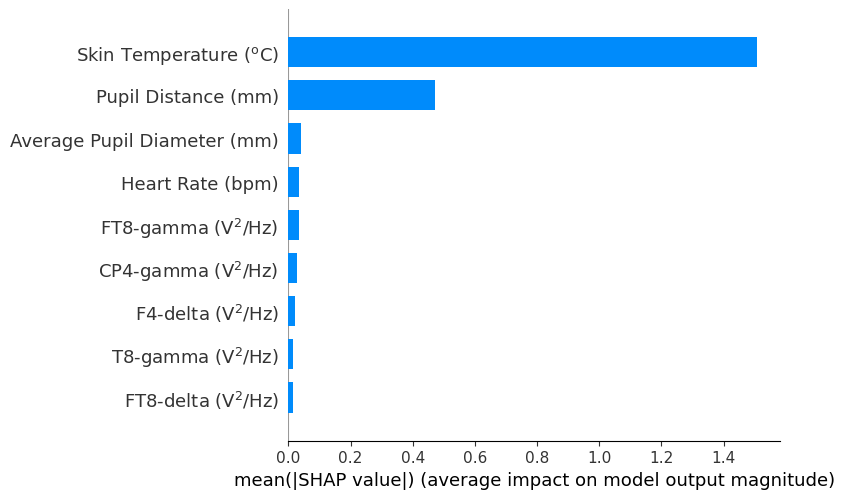

In [7]:
## Lets now use SHAP values for feature importance

import shap

shap_values = shap.TreeExplainer(forest_reg).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=9)


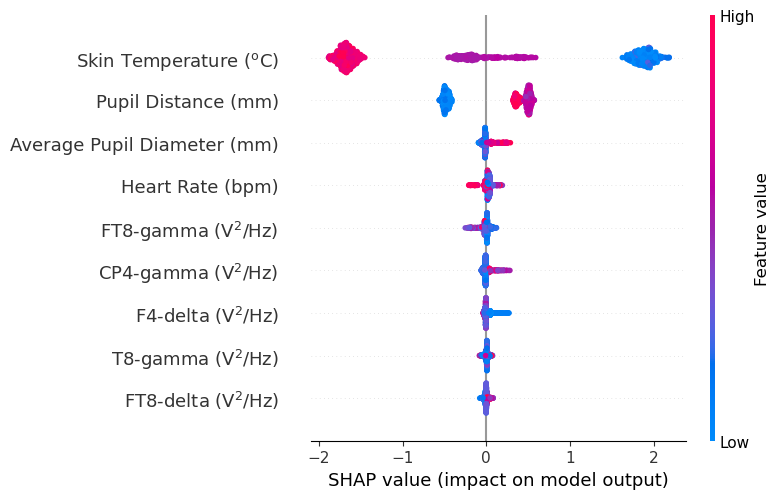

In [8]:
shap.summary_plot(shap_values, X_train,max_display=9)


In [9]:
## lets get the top 9 features as selected by SHAP values

shap_names=X_train.columns[np.argsort(np.abs(shap_values).mean(0))]  ## gives entire names in ascending order

## lets reverse the list of the names
shap_descending=[]
for i in reversed(shap_names):
    shap_descending.append(i)

## lets get the top 9 features as selected by SHAP values
    
names_rev_shap=[]
for i in range(0,9):
    names_rev_shap.append(shap_descending[i])

Text(0.5, 1.0, "Pearson's Correlation Coefficient Plot")

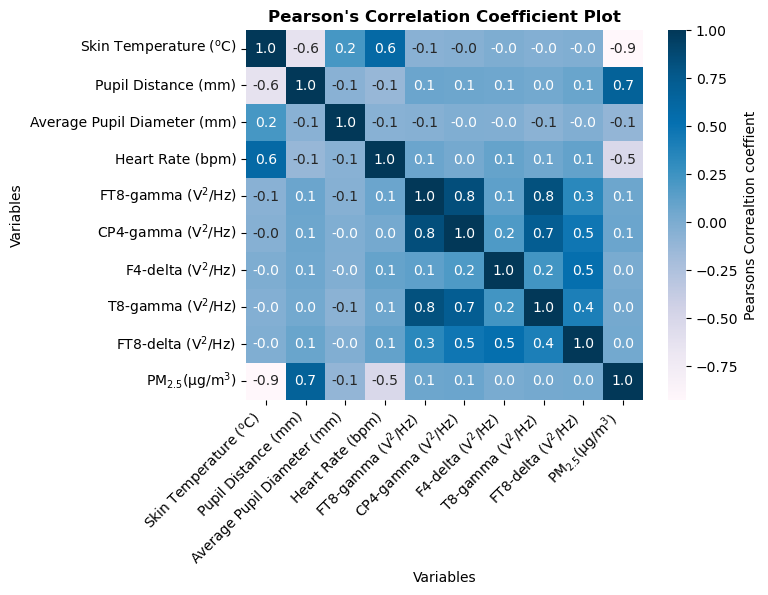

In [10]:
## Now that we have the list of top 10 features, lets plot the correlation plot

names_rev_shap.append('$\mathrm{PM_{2.5} (\mu g/m^3)}$') ## add the target CO2 for the correlation matrix
corr=df7[names_rev_shap].corr()


import seaborn as sns
import matplotlib.pyplot as plt


ax=sns.heatmap(corr,cmap="PuBu",annot=True,fmt=".1f",cbar_kws={'label': 'Pearsons Correaltion coeffient'})

plt.xticks(rotation=45,horizontalalignment='right')

ax.set(xlabel="Variables",ylabel="Variables")

plt.title("Pearson's Correlation Coefficient Plot",fontweight='bold')

In [11]:
## Now lets plot the mutual information

from sklearn.feature_selection import mutual_info_regression

## Lets calucalute the mutual information against each of the top 10 features

mf_mat=[]
for i in range(0,10):
    for j in range(0,10):
        dd=df7[names_rev_shap[i]]  ## extracting the labels
        mm=df7[names_rev_shap[j]]  ## extracting the labels

        kk=dd.to_numpy().reshape((-1,1)) ## reshape the array to (2317,1)
        
        vv=mm.to_numpy().reshape((-1,1))
        pp=vv.reshape(1383,)             ## reshape the array to (2317,) as required by the mutual_info_regression function
        
        
        mi=mutual_info_regression(kk,pp)
        mf_mat.append(mi)

mf_mat_arr=np.asarray(mf_mat)  ## transform the elements from a list to array

# reshape array into 10 rows x 10 columns

reshaped_array = mf_mat_arr.reshape(10, 10).T 

Text(0.5, 1.0, 'Mutual Information Plot')

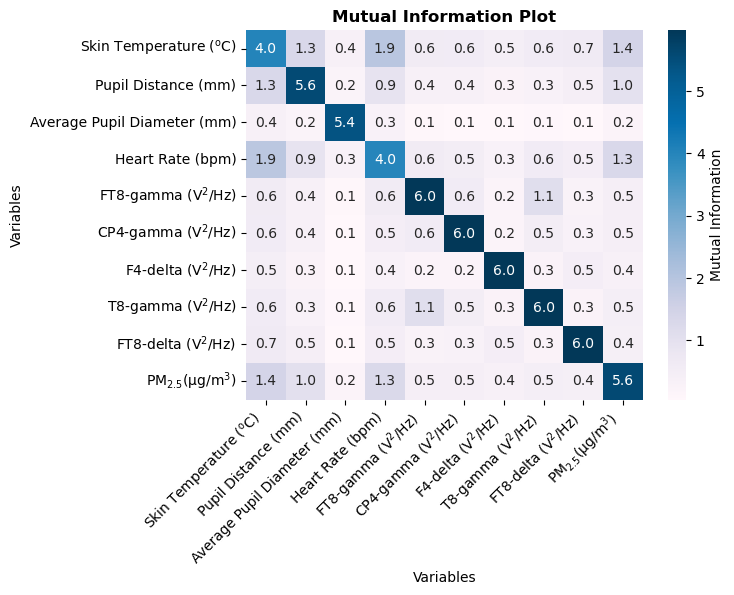

In [12]:
mf_df=pd.DataFrame(reshaped_array,columns=[names_rev_shap],index=[names_rev_shap]) ## convert into a pandas DataFrame


ax=sns.heatmap(mf_df,cmap="PuBu",annot=True,fmt='.1f',cbar_kws={'label':'Mutual Information'}) ## Now lets plot the mutual information heatmap

plt.xticks(rotation=45,horizontalalignment='right')

ax.set(title="Mutual Information Plot",xlabel="Variables",ylabel="Variables")

plt.title("Mutual Information Plot",fontweight='bold')

In [13]:
## The test prediction

test_prediction_RF=forest_reg.predict(X_test)
RF_mse=mean_squared_error(y_test,test_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_test=RF_rmse

print('The test RMSE for PM2_5 is:::', '%.2f' % RF_rmse)

The test RMSE for PM2_5 is::: 0.35


In [14]:
### The correlation values

from scipy.stats import pearsonr

## The train correlation
train_r_sq=(pearsonr(y_train,train_prediction_RF)[0])**2
correlation_train=int(train_r_sq*100)/100 ## display only two digits without rounding
print(correlation_train)

## The test correlation
test_r_sq=(pearsonr(y_test,test_prediction_RF)[0])**2
correlation_test=int(test_r_sq*100)/100 ## display only two digits without rounding
print(correlation_test)

0.99
0.97


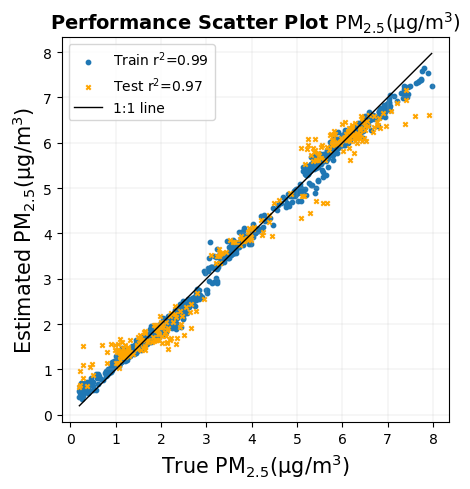

In [15]:
## Lets plot the scatter plot

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.default']='regular'

plt.figure(figsize=(5,5))
plt.scatter(y_train, train_prediction_RF,s=10,c='C0',label="Train $r^2$={}".format(correlation_train))
plt.scatter(y_test, test_prediction_RF,marker='x',s=10,c='orange',label='Test $r^2$={}'.format(correlation_test))


p1 = max(max(train_prediction_RF), max(y_train))
p2 = min(min(train_prediction_RF), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black',label='1:1 line',linewidth=1)
plt.xlabel('True $\mathrm{PM_{2.5} (\mu g/m^3)}$', fontsize=15)
plt.ylabel('Estimated $\mathrm{PM_{2.5} (\mu g/m^3)}$', fontsize=15)
plt.axis('equal')
plt.title("Performance Scatter Plot $\mathrm{PM_{2.5} (\mu g/m^3)}$", fontsize=14,fontweight="bold")
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()

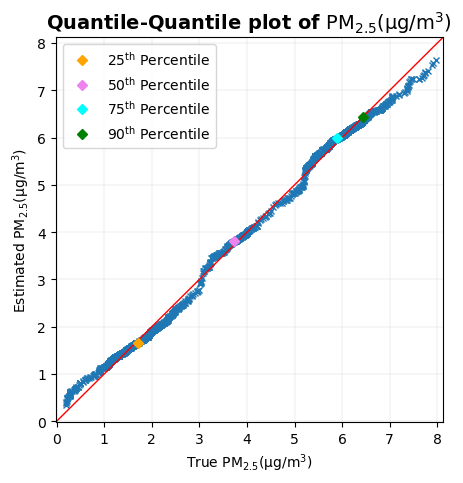

In [16]:
## Lets plot the quantile quantile 

all_preds=np.concatenate((train_prediction_RF,test_prediction_RF)) ## the list of all predictions and target values
preds=np.sort(all_preds)
tars=target.sort_values()

import statsmodels.api as sm
import scipy.stats as stats

plt.rc("figure", figsize=(5,5)) ## to make same figure size in statsmodels.api

pp_x = sm.ProbPlot(preds, fit=False)
pp_y = sm.ProbPlot(tars, fit=False)
qq = pp_x.qqplot(xlabel='True $\mathrm{PM_{2.5} (\mu g/m^3)}$',ylabel='Estimated $\mathrm{PM_{2.5} (\mu g/m^3)}$',marker='x',markersize=4,other=pp_y)

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1)
                                 
tars_25=np.percentile(tars,25)  ## for the percentiles                                                        
tars_50=np.percentile(tars,50)
tars_75=np.percentile(tars,75)
tars_90=np.percentile(tars,90)


preds_25=np.percentile(preds,25)
preds_50=np.percentile(preds,50)
preds_75=np.percentile(preds,75)  
preds_90=np.percentile(tars,90)  ## end of percentiles

plt.plot(tars_25,preds_25,marker="D",markersize=5,color="orange",linestyle ='None',label="$\mathrm{25^{th}}$ Percentile")
plt.plot(tars_50,preds_50,marker="D",markersize=5,color="violet",linestyle ='None',label="$\mathrm{50^{th}}$ Percentile")
plt.plot(tars_75,preds_75,marker="D",markersize=5,color="Cyan",linestyle ='None',label="$\mathrm{75^{th}}$ Percentile")
plt.plot(tars_90,preds_90,marker="D",markersize=5,color="Green",linestyle ='None',label="$\mathrm{90^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)

plt. title('Quantile-Quantile plot of $\mathrm{PM_{2.5} (\mu g/m^3)}$ ',fontsize=14,fontweight="bold")

plt.legend()
plt.show()


## Note that since the number of samples is the same, sorting the values in ascending or descending order and then...
## plotting a scatter plot will also do the same thing as the quantiles are located in same point for distribution..
## of same size.

In [17]:
## Lets now plot the Time series plot. 

splitted_original_data=pd.concat([y_train,y_test]) ## concatenate the splitted original target variable i.e. PM2.5
splitted_original_data

predicted_splited=np.concatenate((train_prediction_RF,test_prediction_RF),axis=None) ## concatenate the predicted....
predicted_splited ## train and test numpy arrays

splitted_df=splitted_original_data.to_frame() ##convert splitted original data PM2.5 from pandas series to 
splitted_df    

splitted_df['predicted_splited']=predicted_splited.tolist() ## Now concatenate the PM2.5 dataframe and the
splitted_df                                                         ## the numpy array

sorted_df=splitted_df.sort_values(by='dateTime') ## sort according to timestamp
sorted_df 

df_reset=sorted_df.reset_index() ##reset the index and start from zero as the hh:mm:ss is not real time
df_reset 

df_indexed=df_reset.drop(columns="dateTime") 
df_indexed 

df_timeseries=df_indexed.rename(columns={'$\mathrm{PM_{2.5} (\mu g/m^3)}$':'True $\mathrm{PM_{2.5}}$','predicted_splited':'Estimated $\mathrm{PM_{2.5}}$'})
df_timeseries 

,True $\mathrm{PM_{2.5}}$,Estimated $\mathrm{PM_{2.5}}$
0,1.84,1.9586
1,2.05,2.1260
2,2.16,2.1896
3,2.41,2.3792
4,2.42,2.2923
...,...,...
1378,2.09,1.9766
1379,2.27,2.0770
1380,2.21,2.1284
1381,2.38,2.2903


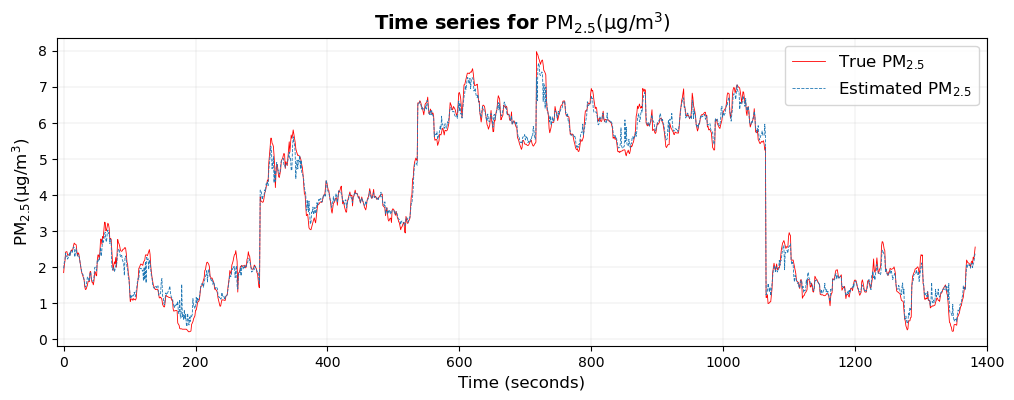

In [18]:
##Lets now plot the time series

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_timeseries['True $\mathrm{PM_{2.5}}$'],label='True $\mathrm{PM_{2.5}}$',linewidth=0.6,color='red')
ax.plot(df_timeseries['Estimated $\mathrm{PM_{2.5}}$'],label='Estimated $\mathrm{PM_{2.5}}$',linewidth=0.6,linestyle='--')

plt.xlim([-10,1400])

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('$\mathrm{PM_{2.5} (\mu g/m^3)}$',fontsize=12)
plt.title('Time series for $\mathrm{PM_{2.5} (\mu g/m^3)}$',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()

In [19]:
## lets now extract rows from the timeseries so that there is discontinuity in the trials, as the red lines seen are...
## continous

timeseries_1=df_timeseries.iloc[0:297,:]
timeseries_2=df_timeseries.iloc[298:536,:]
timeseries_3=df_timeseries.iloc[537:1064,:]
timeseries_4=df_timeseries.iloc[1065:1382,:]


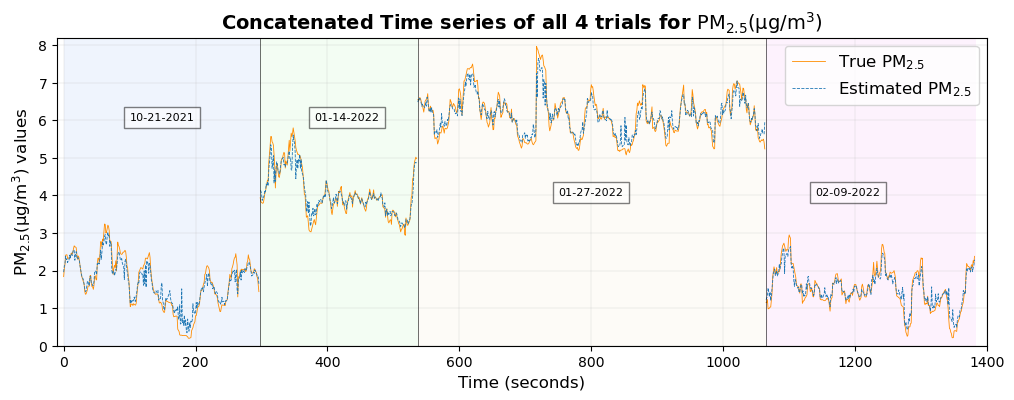

In [20]:
fig, ax = plt.subplots(figsize=(12,4))

import matplotlib.patches as patches

ax.plot(timeseries_1['True $\mathrm{PM_{2.5}}$'],label='True $\mathrm{PM_{2.5}}$',linewidth=0.6,color='darkorange')
ax.plot(timeseries_1['Estimated $\mathrm{PM_{2.5}}$'],label='Estimated $\mathrm{PM_{2.5}}$',linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_2['True $\mathrm{PM_{2.5}}$'],linewidth=0.6,color='darkorange')
ax.plot(timeseries_2['Estimated $\mathrm{PM_{2.5}}$'],linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_3['True $\mathrm{PM_{2.5}}$'],linewidth=0.6,color='darkorange')
ax.plot(timeseries_3['Estimated $\mathrm{PM_{2.5}}$'],linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_4['True $\mathrm{PM_{2.5}}$'],linewidth=0.6,color='darkorange')
ax.plot(timeseries_4['Estimated $\mathrm{PM_{2.5}}$'],linewidth=0.6,linestyle='--',color='C0')


plt.text(100,6, '10-21-2021', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(380,6, '01-14-2022', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(750,4, '01-27-2022', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1140,4, '02-09-2022', fontsize = 8, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

rect1 = patches.Rectangle((0, 0), 298, 8.2, fc="CornflowerBlue",alpha=0.1)
ax.add_patch(rect1)

rect2 = patches.Rectangle((298, 0), 239, 8.2, fc="lightgreen",alpha=0.1)
ax.add_patch(rect2)

rect3 = patches.Rectangle((537, 0), 528, 8.2, fc="wheat",alpha=0.1)
ax.add_patch(rect3)

rect4 = patches.Rectangle((1065, 0), 318, 8.2, fc="violet",alpha=0.1)
ax.add_patch(rect4)


plt.xlim([-10,1400])
plt.ylim([0,8.2])


plt.axvline(x=298, color='k', linewidth=0.4)
plt.axvline(x=537, color='k', linewidth=0.4)
plt.axvline(x=1065, color='k', linewidth=0.4)


plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('$\mathrm{PM_{2.5} (\mu g/m^3)}$ values',fontsize=12)
plt.title('Concatenated Time series of all 4 trials for $\mathrm{PM_{2.5} (\mu g/m^3)}$',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()